In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Chapter 1 - Introduction
## Investment Science

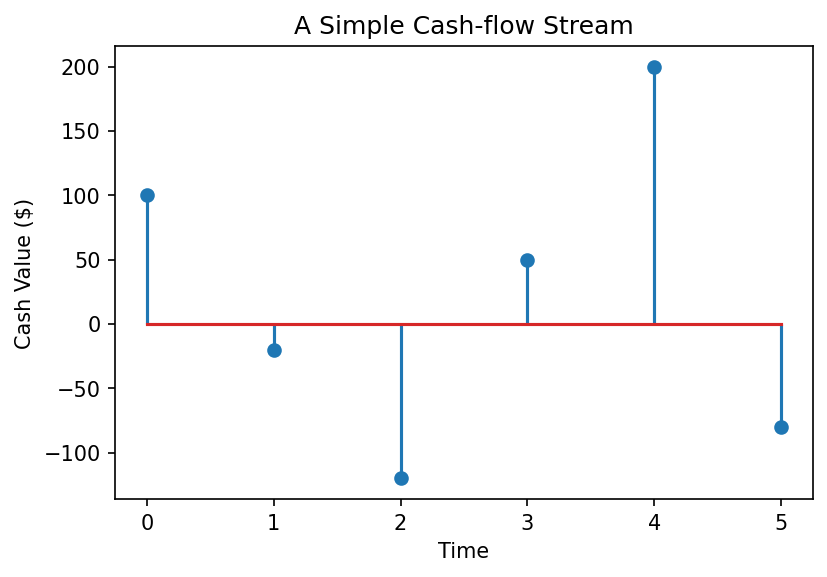

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 150

time = [0, 1, 2, 3, 4, 5]
cash_flow = [100, -20, -120, 50, 200, -80]

plt.figure(1)
plt.stem(time, cash_flow)
plt.title("A Simple Cash-flow Stream")
plt.xlabel("Time")
plt.ylabel("Cash Value ($)")
plt.show()

- All investments are cash flow streams:
  - Consider things in terms of their *cash value*.
  - Cash is *fungible* (mutually interchangeable). This allows for direct comparison: **The Comparison Principle**.
  - This concept changed the world: barter economy to a money economy.
- What are the dangers?
  - Diablo 3: The real money auction house debacle (GDC 2019 - Cursed Problems in Game Design).
  - When everything is fungible, nothing is unique.
  - Obviously, not everything should have a cash value.


- Therefore, investment science is using *scientific tools* (mathematical analysis) to customize cash flow streams.
  - Many ways to summarize / describe a cash flow stream: NPV, IRR, duration...
- Investment science generally occurs within the confines of a market, which provides a structure to the science. Adds the applied part to the applied mathematics.

## Basic Market Properties
- **Arbitrage**
  - **Example**: A simple borrow and lend.
  - Assuming "no arbitrage" provides a lot of structure to the market and prevents degenerate solutions.
- **Risk Aversion**
  - **Example**: Coin-flip vs certain cash.
  - People are risk averse. They need to be rewarded to take on risk.

## Problems We Are Going to Solve
- The Pricing Problem:
  - What is the appropriate price of an investment (or project or product), given the rest of the market?
- The Hedging Problem:
  - How can we protect ourselves from the risks of a cash flow stream?
- The Portfolio Problem:
  - If we have a bunch of cash, how should we invest among the products in the market?
- Combination and Consumption Problems.

# Chapter 2 - The Basic Theory of Interest
“Compound interest is the eighth wonder of the world. He who understands it, earns it … he who doesn't … pays it.” - Albert Einsten

## Principal and Interest
**Simple Interest:**
$$ V = A( 1 + rn) $$
- $V$ is the final value
- $A$ is the amount invested
- $r$ is the annual (yearly) simple interest rate
- $n$ is the number of years

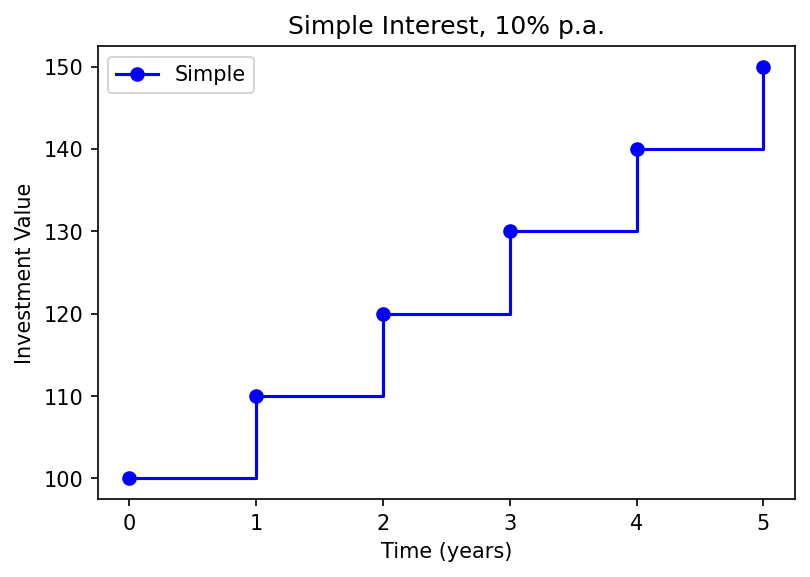

In [3]:
# Example 2: Simple Interest.

A = 100
r = 0.1
T = 5
n = np.linspace(0, T, T + 1)
V = A*(1 + r*n)

plt.figure(2)
plt.step(n, V, '-bo', where='post', label='Simple')
plt.title("Simple Interest, 10% p.a.")
plt.xlabel("Time (years)")
plt.ylabel("Investment Value")
legend = plt.legend()

**Compound Interest:**
$$ V = A\left(1 + \frac{r}{m}\right)^k $$
- $V$ is the final value
- $A$ is the initial amount invested
- $r$ is the annual (yearly) interest rate
- $m$ is the compounding period, i.e., "How often does the interest compound?"
- $k$ is the number of compounding periods, i.e., "How many times has the interest compounded?"

Compound interest gives rise to *geometric growth* because of its power form (the exponent).

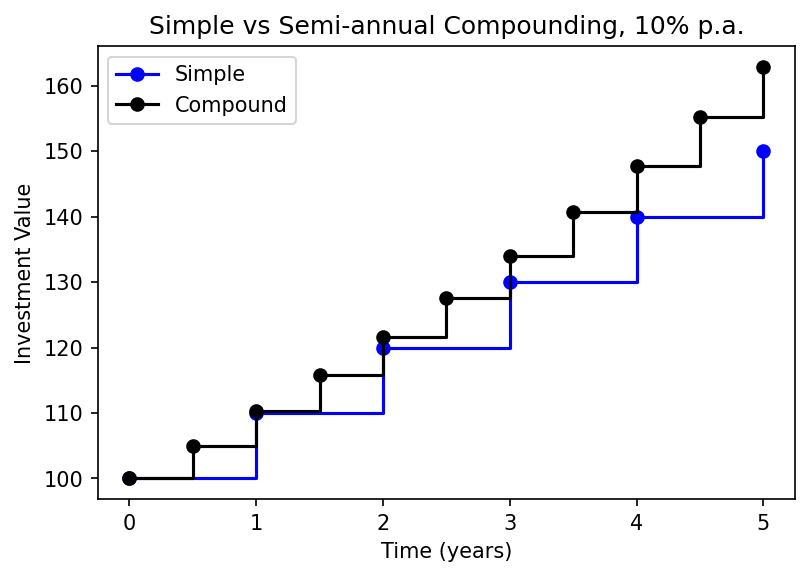

In [4]:
A = 100
r = 0.1
T = 5
n = np.linspace(0, T, T + 1)
V = A*(1 + r*n)

m = 2
t = np.linspace(0, T, T*m + 1)
k = np.arange(0, T*m + 1)
V_semiAnnual = A * (1 + r / m) ** k

plt.figure(3)
plt.step(n, V, '-bo', where='post', label='Simple')
plt.step(t, V_semiAnnual, '-ko', where='post', label='Compound')
plt.title("Simple vs Semi-annual Compounding, 10% p.a.")
plt.xlabel("Time (years)")
plt.ylabel("Investment Value")
legend = plt.legend()

**Nominal vs Effective Rate**
- Although the compound interest is quoted as an annual rate, e.g., "8% per year compounded monthly", this is not the actual growth of the initial amount, $A$, over the course of a year.
- This quoted rate, is known as the *nominal rate*. Nominal means "in name only", which means "not really". This is "not really" the rate.
- The rate that $A$ actually grows over a year, denoted $r'$, is known as the *effective rate*. 
- Thus, $$ r' = \left(1 + \frac{r}{m}\right)^m. $$

**Continuous Compounding:**
$$ V = A e^{rt} $$
- $V$ is the final value
- $A$ is the initial amount invested
- $r$ is the annual (yearly) interest rate
- $e$ is the natural number or Euler's number, the base of the natural logarithm
- $t$ is the time invested (in years)

Continuous compounding gives rise to *exponential growth*.


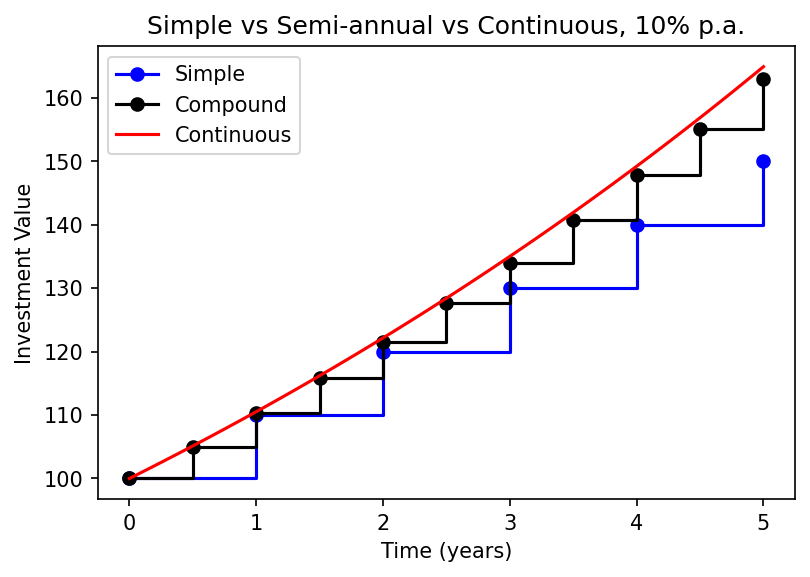

In [5]:
A = 100
r = 0.1
T = 5
n = np.linspace(0, T, T + 1)
V = A*(1 + r*n)

m = 2
t = np.linspace(0, T, T*m + 1)
k = np.arange(0, T*m + 1)
V_semiAnnual = A * (1 + r / m) ** k

numSteps = 100
t_continuous = np.linspace(0, T, numSteps)
V_continuous = A * np.exp(r * t_continuous)

plt.figure(4)
plt.step(n, V, '-bo', where='post', label='Simple')
plt.step(t, V_semiAnnual, '-ko', where='post', label='Compound')
plt.plot(t_continuous, V_continuous, '-r', label='Continuous')
plt.title("Simple vs Semi-annual vs Continuous, 10% p.a.")
plt.xlabel("Time (years)")
plt.ylabel("Investment Value")
plt.legend()
plt.show()


### Debt and Money Markets
- Debt works the same way as investments, although usually different rates apply.
- Different rates apply to different circumstances and it can be very challenging to figure out which interest rate to use. We'll return to this problem in the future.

## Present Value
- The value of a cash amount can be projected forward or backwards in time by using the appropriate interest rate.
- Bringing a value backwards in time is known as *discounting*.
- **Example:**
    - I owe Karl $\$100$ exactly one year from now. The prevailing simple interest rate is $r$. How much money do I need today to meet this obligation? 
    - $x(1 + r) = 100$
    - $x = 100\frac{1}{1 + r}$
- $d := \frac{1}{1 + r}$ is the *discount factor* (corresponding to the simple rate, $r$) that I use to obtain the *present value* of a cash flow 1 year from now.
- There are discount factors corresponding to each interest rate and compounding convention.

## Present and Future Values of Streams
### The Ideal Bank
- Has the same interest rate for deposits and loans, which applies equally to all amounts.
- No transaction fees or services costs.
- The *constant ideal bank* has a single, constant interest rate.

### Future Value
**Future Value of a Cash Flow Stream:** Consider a nominal annual interest rate, $r$, compounding at $m$ periods per year. Given an equally-spaced cash flow stream $(x_0, x_1, ..., x_n)$, which each cash flow occuring at the start of a period, the future value of this cash flow stream at time $n$ (the start of period $n$) is:
$$ \text{FV} = x_0\left(1 + \frac{r}{m}\right)^n + x_1\left(1 + \frac{r}{m}\right)^{n-1} + ... + x_n. $$


### Present Value
**Present Value of a Cash Flow Stream:** Consider a nominal annual interest rate, $r$, compounding at $m$ periods per year. Given an equally-spaced cash flow stream $(x_0, x_1, ..., x_n)$, which each cash flow occuring at the start of a period, the present value of this cash flow stream at time $0$ is:
$$ \text{PV} = x_0 + x_1 \frac{1}{1 + \frac{r}{m}} + x_2 \frac{1}{\left(1 + \frac{r}{m}\right)^2}+...+ x_n \frac{1}{\left(1 + \frac{r}{m}\right)^n}.$$

### Present Value and an Ideal Bank
- **Key Idea**: An ideal bank can always transform one cash flow stream into another, iff they have the same present value. 